## Ce fichier  est un notebook Python.

Il comporte deux types de cellules :

* les cellules d'édition dans lesquelles vous pouvez saisir du texte éventuellement enrichi de mises en formes ou de liens hypertextes avec la syntaxe du langage HTML simplifié qui s'appelle Markdown. Voir http://daringfireball.net/projects/markdown/ pour la syntaxe de Markdown.

* les cellules de code où l'on peut saisir du code Python3 puis le faire exécuter avec la combinaison de touches `CTRL + RETURN`

Une cellule peut être éditée  de deux façons différentes :

* en mode _commande_ lorsqu'on clique sur sa marge gauche qui est surlignée alors en bleu, on peut alors  :

    - changer le type de la cellule en appuyant sur `m` pour passer en cellule Markdown ou sur `y` pour passer en cellule de code
    
    - insérer une cellule juste au-dessus en appuyant sur `a`
    
    - insérer une cellule juste en-dessous en appuyant sur `b`
    
    - couper la cellule en appuyant sur `x` etc ...
    
* en mode _édition_ lorsqu'on clique sur l'intérieur de la cellule.

L'aide complète sur les raccourcis claviers est accessible depuis le bouton `Help` dans la barre d'outils ci-dessus.


# Bac à sable PIL

In [16]:
from PIL import Image               # to load images
from IPython.display import display # to display images

In [17]:
# Quelques outils de partieA.py

def str_to_bytes(chaine, encodage = 'utf8'):
    """
    Paramètres :
        chaine de type str, une chaine de caractères
        encodage un paramètre de type str fixant l'encodage, par défaut utf8
    Valeur renvoyée :
        un flux d'octets de type bytes obtenu par encodage de chaine
    """
    return chaine.encode(encoding = encodage)

def bytes_to_str(flux, encodage = 'utf8'):
    """
    Paramètres :
        flux d'octets de type bytes
        encodage un paramètre de type str fixant l'encodage, par défaut utf8
    Valeur renvoyée :
        une chaine de caractères de type str obtenue par décodage de flux
    """
    return flux.decode(encoding = encodage)

def hex_to_bytes(hexadecimal):
    """
    Paramètres :
        hexadecimal de type str représentant un nombre à 2 chiffres en base 16
    Valeur renvoyée :
        un octet de type bytes représentant le même nombre qu'hexadecimal
    """
    return bytes.fromhex(hexadecimal)

def fichier_to_image(fichier):
    """
    Paramètres :
        fichier de type str qui est un chemin vers un fichier image
    Valeur renvoyée :
        objet image représentant l'image contenue dans fichier pour le module PIL
        le mode de l'image renvoyée est 'L' pour niveaux de gris (1 octet par pixel)
    """
    img = Image.open(fichier)
    img = img.convert('L')
    return img

def image_to_bytes(img):
    """
    Paramètres :
        img est un objet renvoyé par fichier_to_image représentant une image pour le module PIL
        img de mode 'L' pour niveaux de gris (1 octet par pixel)
    Valeur renvoyée :
        un flux d'octets représentant les valeurs des pixels de l'image
    """
    return bytes.fromhex(' '.join([decimal_to_hex(pixel) for pixel in list(img.getdata())]))

def bytes_to_image(flux, largeur, hauteur):
    """
    Paramètres :
        flux de type bytes  représente la séquence de valeurs des pixels d'une image en niveaux de gris
        largeur et hauteur de type int sont les dimensions de l'image
    Valeur renvoyée :
        un objet représentant une image en niveaux de gris pour le module PIL
    """
    im = Image.new( 'L', (largeur, hauteur))
    im.putdata([flux[k] for k in range(len(flux))])
    return im

def decimal_to_hex(n):
    """
    Parametres :
        n de type int
    Valeur renvoyée:
        représentation de n en base 16 sous forme de chaîne de caractères
        on rajoute un 0 à gauche si un seul chiffre en base 16
    """
    rep = ''
    #à compléter 

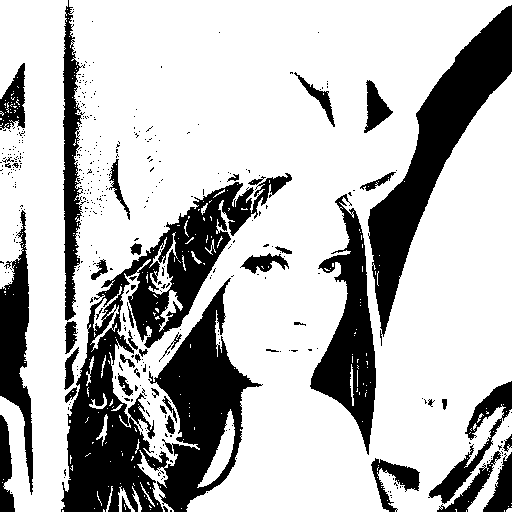

In [18]:
# test d'affichage de Lena
lena =  fichier_to_image('lena.png')
display(lena)  #utilisez display pour afficher l'image dans le notebook

In [9]:
# la fonction test_image de test_partieA.py
# ne fonctionne que si vous avez codé decimal_to_hex

def test_image(fichier = 'damier_2x2.png'):
    img = fichier_to_image(fichier)
    print("Représentation de l'objet image PIL", end = "\n\n")
    print(img, end = "\n\n")
    print("Pixels de l'objet image PIL", end = "\n\n")
    print(list(img.getdata()), end = "\n\n")
    print("Pixels en hadécimal de l'objet image PIL", end = "\n\n")
    print([decimal_to_hex(pixel) for pixel in list(img.getdata())], end = "\n\n")
    img_bytes = image_to_bytes(img)
    print("Affichage de l'image sous forme de flux d'octets", end = "\n\n")
    print(img_bytes, end = "\n\n")
    print("Inversion de tous les octets", end = "\n\n")
    img_bytes_sortie = b''.join([(255 - img_bytes[k]).to_bytes(1, byteorder='little') for k in range(len(img_bytes))])
    print(img_bytes_sortie, end = "\n\n")
    img_sortie = bytes_to_image(img_bytes_sortie, img.width, img.height)
    img_sortie.show()
    nom, extension = fichier.split('.')
    img_sortie.save('sortie-test-image-' + nom + '.' + extension)

In [14]:
# Décommentez lorsque decimal_to_hex est codée
# test_image()

Vous pouvez écrire votre code dans les cellules ci-dessous

In [ ]:
# saisir son code Python dans cette cellule puis exacuter avec CTRL + RETURN

In [15]:
# une autre cellule
# on peut rajouter autant de cellules qu'on veut en cliquant sur la zone grise en dessous du cadre